# Loan Prediction

This is an attempt to build a model to predict if a person is going to pay the loan or not.

There are many insights and comments in this notebook, that can be used for later usage and other projects.

In [1]:
import sys
from datetime import datetime
from importlib import reload
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sys.path.append(".")
import helper_script as hs

reload(hs)

<module 'helper_script' from '/home/william/Documents/statistical-learning/tensorflow_keras_course/helper_script.py'>

In [3]:
# the dataset with metadata about the dataset
# pd.read_csv("../data/lending_club_info.csv", index_col="LoanStatNew")
df_00 = pd.read_csv("../data/lending_club_loan_two.csv")
df_00

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [4]:
# which is the target variable?
target_variable = "loan_status"
# this is one of the most important things to determine
# when we are working with a supervised learning problem

In this dataset we have a variable that tells when the loan was issued: `issue_d`. 

To simulate a scenario of new loans coming we should split according to time. 

We do this we do this with the intent to simulate a deployment scenario.

In [5]:
df_00["issue_d"]

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [6]:
# it is string
df_00["issue_d"].dtype 

dtype('O')

<AxesSubplot:>

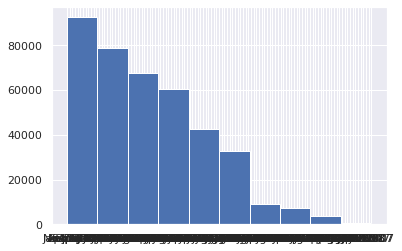

In [7]:
df_00["issue_d"].hist()

Is this division going to affect the performance  of model in the end (real deploy)?

Yes it will.

But if we want to know how the data drifts and how the model will perform in this circunstances we should split according to time.

I should research more about this...


The best think to do in the end is to use all the data that we have available to train the model.

In [8]:
# How to convert string into year-month?
issue_date = pd.to_datetime(df_00["issue_d"], exact=False)

Remeber that this step is used just for the train test split  according to year-month of loan issue. 

So we shouldn't include the `issue_data` variable into the data frame.

<AxesSubplot:>

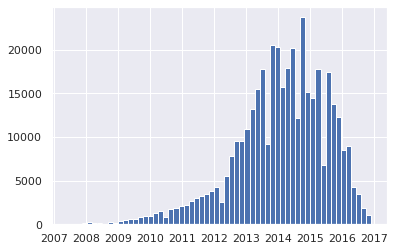

In [9]:
issue_date.hist(bins=60)

In [10]:
issue_date.value_counts().sort_index()

2007-06-01       1
2007-07-01      26
2007-08-01      26
2007-09-01      15
2007-10-01      34
              ... 
2016-08-01    1615
2016-09-01    1059
2016-10-01     853
2016-11-01     594
2016-12-01     441
Name: issue_d, Length: 115, dtype: int64

In [11]:
# find where the median of the distribution of dates is:
list(issue_date.sort_values())[len(issue_date)//2]

Timestamp('2014-04-01 00:00:00')

In [12]:
# Find where 70% percentile of the distribution is:
list(issue_date.sort_values())[int(len(issue_date)*0.7)]
# Obs: using np.quantile doesn't work with timestamp datatype.

Timestamp('2015-01-01 00:00:00')

Without the `list()` around the `pd.Series` the index will take the pd.Series' index.

We'll make `2015-01` as the threshold for training and test.

In [14]:
threshold_date_train_test_split = datetime(2015,1,1)
mask_train = issue_date <= threshold_date_train_test_split

# verify if the proportion for train data makes sense
mask_train.sum()/len(mask_train)

0.7206095497815822

In [15]:
# Make the train_test_split using the time variable
df_features_train = df_00[mask_train].drop(target_variable, axis=1)
df_features_test = df_00[~mask_train].drop(target_variable, axis=1)
df_target_train = df_00[mask_train][target_variable]
df_target_test = df_00[~mask_train][target_variable]

Below is the previous attempt to make a train and test split.

This is an important issue, when you have a new dataset and you are worried about the production phase. 

We should see if there are any variable that tell us when the data arrived, this variable can be used to make the train test split. 

What are the drawbacks of this strategy?

The alternative option is to just split using the `train_test_split()` from `sklearn` function, without considering
the date when the data arrived.

What are the advantages and disadvantages of doing the train test split with a time variable?

I think that in the end we should be using the whole dataset to train the model.

But for the understanding of the phenomena we should make a simulation of how the data is coming into the deployment setting.

This can help us undersatand model drift, and also think about continous learning of the model.

If we build our program around this form of spliting we can forsee challenges with continous training.

For example, we can see how the model adapts to the change of the data generating process.

In [ ]:
# from sklearn.model_selection import train_test_split
# df_features_train, df_features_test, df_target_train, df_target_test = \
#     train_test_split(df_features, df_target, test_size=0.25, random_state=42)

In [16]:
# this dataset will be used for exploratory data analysis
# feature engineering, and the creation of the feature pipeline
# and model training
df_features_train.shape

(285383, 26)

In [17]:
# this will be used in a simulation like of deployment of the model
df_features_test.shape

(110647, 26)

In [18]:
# this data will be used to train the model
# and determine the feature engineering steps that we'll need to make
df_target_train.shape

(285383,)

In [19]:
# this data frame will only be used in the last of last steps
# when we want a final metric for model comparison
df_target_test.shape 

(110647,)